In [14]:
import numpy as np  
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import os

In [39]:
path=os.getcwd()+'/bias'
fitsfile=fits.open(path+'/'+'16-23-54_Ha_Bias_0.00s_0000.fits')
#fitsfile.info() 

datax = fitsfile[0].data

datax

array([[162, 163, 159, ..., 159, 161, 165],
       [164, 163, 162, ..., 162, 159, 162],
       [162, 162, 168, ..., 163, 161, 162],
       ...,
       [164, 161, 161, ..., 161, 163, 163],
       [161, 163, 162, ..., 162, 160, 162],
       [157, 160, 160, ..., 161, 160, 160]], dtype=uint16)

In [41]:
datax.shape

(3194, 4788)

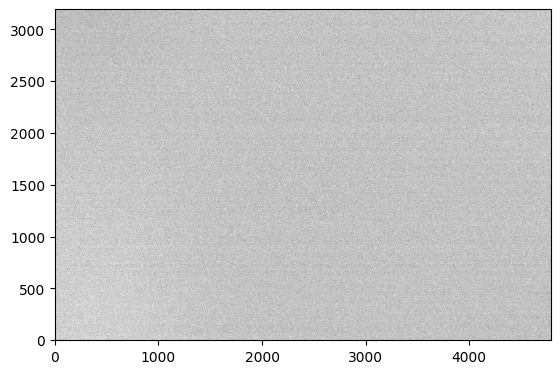

In [42]:
plt.imshow(datax, cmap='gray', vmin=155, vmax=163, origin='lower')


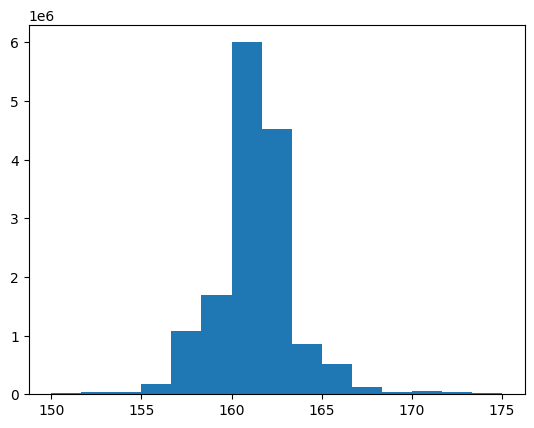

In [43]:
plt.hist(datax.flatten(),range=(150,175), bins=15);

In [44]:
def bias():
    path=os.getcwd()+'/bias'
    Num_of_files=len(os.listdir(path))
    Grid=np.zeros(datax.shape)
    for file in os.listdir(path):
        fitsfile=fits.open(path+'/'+file)
        dati = fitsfile[0].data
        Grid+=dati
    Grid/=Num_of_files
    return Grid
    

### MASTERBIAS

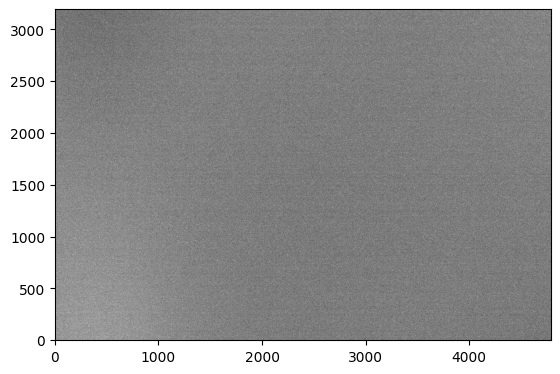

In [ ]:
masterbias=bias()
mean=np.mean(masterbias)
std=np.std(masterbias)
plt.imshow(masterbias, cmap='gray', vmin=mean-2*std, vmax=mean+2*std, origin='lower')